## Exploring the data
Before training a model, we need to learn about the data we want to use. In the following, we will:

1. Conduct an explorative analysis of the data,
2. Preprocess the data,
4. Prepare the data to be used to train a model.

#### What is the goal?
First, we need to define what we actually want to do and what data we will need for that. In this case, we want to train an AI model to automatically route customer support tickets to the correct department.

## Explorative Analysis
We first take a look a the data, to determine what is of use for our goal.

In [1]:
import pandas as pd
filepath = "../data/dataset_en.csv"
df = pd.read_csv(filepath)
df

,subject,body,answer,type,queue,priority,language,version,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
0,Account Disruption,"Dear Customer Support Team,\n\nI am writing to...","Thank you for reaching out, <name>. We are awa...",Incident,Technical Support,high,en,51,Account,Disruption,Outage,IT,Tech Support,NaN,NaN,NaN
1,Query About Smart Home System Integration Feat...,"Dear Customer Support Team,\n\nI hope this mes...",Thank you for your inquiry. Our products suppo...,Request,Returns and Exchanges,medium,en,51,Product,Feature,Tech Support,NaN,NaN,NaN,NaN,NaN
2,Inquiry Regarding Invoice Details,"Dear Customer Support Team,\n\nI hope this mes...",We appreciate you reaching out with your billi...,Request,Billing and Payments,low,en,51,Billing,Payment,Account,Documentation,Feedback,NaN,NaN,NaN
3,Question About Marketing Agency Software Compa...,"Dear Support Team,\n\nI hope this message reac...",Thank you for your inquiry. Our product suppor...,Problem,Sales and Pre-Sales,medium,en,51,Product,Feature,Feedback,Tech Support,NaN,NaN,NaN,NaN
4,Feature Query,"Dear Customer Support,\n\nI hope this message ...",Thank you for your inquiry. Please specify whi...,Request,Technical Support,high,en,51,Feature,Product,Documentation,Feedback,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16333,Problem with Billing Adjustment,An unexpected billing discrepancy has been not...,We apologize for the billing discrepancy in th...,Incident,Billing and Payments,high,en,400,Billing,Payment,Performance,Bug,NaN,NaN,NaN,NaN
16334,Urgent: Incident Involving Data Breach in Medi...,"A data breach has occurred, which might be rel...","Dear [Name], we acknowledge the urgency of the...",Problem,Product Support,medium,en,400,Security,Incident,Bug,Performance,NaN,NaN,NaN,NaN
16335,Performance Problem with Data Analytics Tool,The data analytics tool experiences sluggish p...,We are addressing the performance issue with t...,Incident,Technical Support,high,en,400,Performance,IT,Tech Support,NaN,NaN,NaN,NaN,NaN
16336,Update Request for SaaS Platform Integration F...,Requesting an update on the integration featur...,Received your request for updates on the integ...,Change,IT Support,high,en,400,Feature,IT,Tech Support,NaN,NaN,NaN,NaN,NaN


#### What data to keep?
Looking at the data, a few things look helpful. The 'subject' of a ticket, the 'body' that contain the contents of a customer support ticket and the 'queue' that specifies the department to which the ticket is categorized are perfect for the intended use case. To keep features low, 'subject' and body' are combined into one. Furthermore we will include 'priority', since this is an important information in real world scenarios.

The rest of the data is either 'metadata' or not relevant for our system and can be savely excluded. As such, we will only keep 'body', 'queue' and 'priority'.

In [2]:
# We fill empty values with empty strings to avoid errors
df["body"] = df["subject"].fillna("") + ". " + df["body"].fillna("")
df = df[["body","queue","priority"]]
df

,body,queue,priority
0,Account Disruption. Dear Customer Support Team...,Technical Support,high
1,Query About Smart Home System Integration Feat...,Returns and Exchanges,medium
2,Inquiry Regarding Invoice Details. Dear Custom...,Billing and Payments,low
3,Question About Marketing Agency Software Compa...,Sales and Pre-Sales,medium
4,"Feature Query. Dear Customer Support,\n\nI hop...",Technical Support,high
...,...,...,...
16333,Problem with Billing Adjustment. An unexpected...,Billing and Payments,high
16334,Urgent: Incident Involving Data Breach in Medi...,Product Support,medium
16335,Performance Problem with Data Analytics Tool. ...,Technical Support,high
16336,Update Request for SaaS Platform Integration F...,IT Support,high


#### Taking a look at the data distribution
Next, we take a look on some stats, including the distribution of different ticket 'body' lenghts, tickets per 'queue' item and distribution of 'priority'.
First, some genral statistics for the ticket 'body':
- Average Wordcount: 58.80
- Median Wordcount: 60
- Shortest Message(s): 4 words
- Longest Message(s): 172 words
- There was a single "one word" ticket, which read 'Thecompanyisincapableofaccessinginvestmentanalyticsduetosystemunavailability.'. Obviously this is a mistake and since its only one, this was fixed manually.

The histogram below shows, that most of the messages contain between ~25 and ~100 words, meaning there are not many outliers.

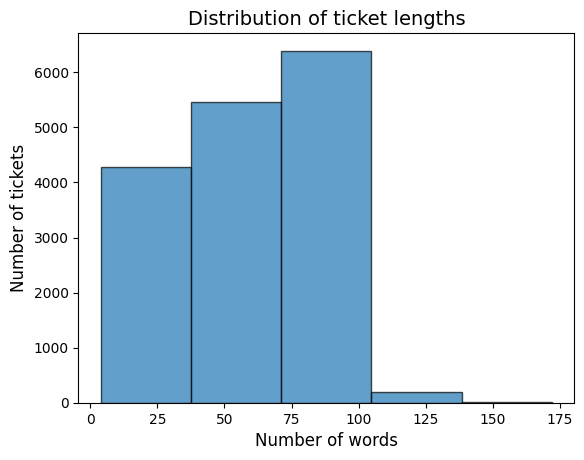

In [3]:
import matplotlib.pyplot as plt
import statistics as st

ticket_lengths = [len(x.split()) for x in df["body"]] # Wordcount for each entry in the 'body' column

plt.hist(ticket_lengths, bins=5, edgecolor='black', alpha=0.7)
plt.xlabel('Number of words', fontsize=12)  
plt.ylabel('Number of tickets', fontsize=12)  
plt.title('Distribution of ticket lengths', fontsize=14)
plt.show() 